# Exploring Dandiset 001333: Parkinson's Electrophysiological Signal Dataset (PESD)

**⚠️ Important Notice:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview

The Parkinson's Electrophysiological Signal Dataset (PESD) contains electrophysiological signals from both healthy and parkinsonian subjects. The dataset includes two types of signals from each group:

1. **Beta Average Rectified Voltage (ARV)**: Determined by calculating the Average Rectified Value of the beta band, achieved by fully rectifying the filtered LFP signal using a fourth-order Chebyshev band-pass filter with an 8 Hz bandwidth, centered around the peak of the LFP power spectrum.

2. **Local Field Potential (LFP)**: Derived from the synchronized activity of neuron populations between the cortex, subthalamic nucleus (STN), and thalamus.

The parkinsonian signals typically show a relatively high power density at the beta frequency (13 to 30 Hz). These beta oscillations in the STN are commonly used as pathological biomarkers for Parkinson's Disease (PD) symptoms.

You can explore this dataset further via the Neurosift platform: [https://neurosift.app/dandiset/001333](https://neurosift.app/dandiset/001333)

## What This Notebook Covers

In this notebook, we will:

1. Load and explore the Dandiset using the DANDI API
2. Examine the structure of NWB files in the dataset
3. Analyze beta band voltage signals from a healthy simulated subject
4. Visualize the time series data and frequency characteristics
5. Compare the data across sessions
6. Discuss potential future analyses

## Required Packages

This notebook requires the following packages:

- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `numpy`
- `matplotlib`
- `pandas`
- `scipy`
- `seaborn`

## Loading the Dandiset

First, let's connect to the DANDI archive and load the Dandiset information.

In [1]:
from dandi.dandiapi import DandiAPIClient
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001333")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print(f"\nDandiset ID: 001333 - Parkinson's Electrophysiological Signal Dataset (PESD)")

# Print a sample of the assets
print("\nSample of assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 52 assets in the dataset

Dandiset ID: 001333 - Parkinson's Electrophysiological Signal Dataset (PESD)

Sample of assets:
- sub-healthy-simulated-data/sub-healthy-simulated-data_ses-001_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-279_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-423_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb


## Examining the Structure of an NWB File

Now, let's load one of the NWB files from the dataset and explore its structure. We'll be using a file from a simulated healthy subject to understand the types of data available in the dataset.

In [2]:
import pynwb
import h5py
import remfile

# Select an NWB file to examine
asset_id = "1d94c7ad-dbaf-43ea-89f2-1b2518fab158"
file_path = "sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-1044_ecephys.nwb"
url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"

print(f"Loading NWB file: {file_path}")
print(f"URL: {url}")

# Load the NWB file
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print basic information about the NWB file
print(f"\nSession description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"File create date: {nwb.file_create_date}")
print(f"Experimenter: {nwb.experimenter}")

Loading NWB file: sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-1044_ecephys.nwb
URL: https://api.dandiarchive.org/api/assets/1d94c7ad-dbaf-43ea-89f2-1b2518fab158/download/


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



Session description: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
Identifier: 84828db4-a3a3-4b2e-abff-6db2b404dd68
Session start time: 2025-04-03 12:30:26.094607-04:00
File create date: [datetime.datetime(2025, 4, 3, 12, 30, 26, 128020, tzinfo=tzoffset(None, -14400))]
Experimenter: ('Ananna Biswas',)


### Subject Information

Let's examine the information about the subject whose data we're analyzing.

In [3]:
# Print subject information
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject description: {nwb.subject.description}")
print(f"Species: {nwb.subject.species}")
print(f"Sex: {nwb.subject.sex}")  # U indicates "unspecified"
print(f"Age: {nwb.subject.age}")  # P0D indicates 0 days postnatal

Subject ID: healthy-simulated-beta
Subject description: This is a simulated dataset generated from a computational model.
Species: Homo sapiens
Sex: U
Age: P0D


### Keywords and Publications

The dataset includes additional metadata such as keywords and related publications.

In [4]:
# Print keywords and related publications
print("Keywords:")
for keyword in nwb.keywords[:]:
    print(f"- {keyword}")

print("\nRelated publications:")
for publication in nwb.related_publications:
    print(f"- {publication}")

Keywords:
- ecephys
- LFP
- Parkinson's Disease
- Beta Band

Related publications:
- https://arxiv.org/abs/2407.17756
- DOI: 10.3389/fnins.2020.00166


## Exploring the Electrodes

The dataset contains information about electrodes used to record the electrophysiological signals. Let's examine the electrode configuration.

In [5]:
# Get electrode information
electrodes_df = nwb.electrodes.to_dataframe()

# Display electrode information
print(f"Number of electrodes: {len(electrodes_df)}")
print("\nElectrode information:")
electrodes_df

Number of electrodes: 12

Electrode information:


,location,group,group_name,label
id,,,,
0,Simulated Cortico-basal-ganglia network of brain,shank0 pynwb.ecephys.ElectrodeGroup at 0x14047...,shank0,shank0_elec0
1,Simulated Cortico-basal-ganglia network of brain,shank0 pynwb.ecephys.ElectrodeGroup at 0x14047...,shank0,shank0_elec1
2,Simulated Cortico-basal-ganglia network of brain,shank0 pynwb.ecephys.ElectrodeGroup at 0x14047...,shank0,shank0_elec2
3,Simulated Cortico-basal-ganglia network of brain,shank1 pynwb.ecephys.ElectrodeGroup at 0x14047...,shank1,shank1_elec0
4,Simulated Cortico-basal-ganglia network of brain,shank1 pynwb.ecephys.ElectrodeGroup at 0x14047...,shank1,shank1_elec1
5,Simulated Cortico-basal-ganglia network of brain,shank1 pynwb.ecephys.ElectrodeGroup at 0x14047...,shank1,shank1_elec2
6,Simulated Cortico-basal-ganglia network of brain,shank2 pynwb.ecephys.ElectrodeGroup at 0x14047...,shank2,shank2_elec0
7,Simulated Cortico-basal-ganglia network of brain,shank2 pynwb.ecephys.ElectrodeGroup at 0x14047...,shank2,shank2_elec1
8,Simulated Cortico-basal-ganglia network of brain,shank2 pynwb.ecephys.ElectrodeGroup at 0x14047...,shank2,shank2_elec2


### Electrode Groups

The electrodes are organized into groups (shanks). Let's explore the electrode group structure.

In [6]:
# Print electrode groups
print("Electrode Groups:")
for group_name, group in nwb.electrode_groups.items():
    print(f"\nGroup: {group_name}")
    print(f"Description: {group.description}")
    print(f"Location: {group.location}")
    print(f"Device: {group.device}")

Electrode Groups:

Group: shank0
Description: Simulated electrode group for shank 0
Location: Simulated Cortico-basal-ganglia network of brain
Device: NEURON_Simulator pynwb.device.Device at 0x140478165983632
Fields:
  description: Virtual probe used in NEURON simulation
  manufacturer: N/A


Group: shank1
Description: Simulated electrode group for shank 1
Location: Simulated Cortico-basal-ganglia network of brain
Device: NEURON_Simulator pynwb.device.Device at 0x140478165983632
Fields:
  description: Virtual probe used in NEURON simulation
  manufacturer: N/A


Group: shank2
Description: Simulated electrode group for shank 2
Location: Simulated Cortico-basal-ganglia network of brain
Device: NEURON_Simulator pynwb.device.Device at 0x140478165983632
Fields:
  description: Virtual probe used in NEURON simulation
  manufacturer: N/A


Group: shank3
Description: Simulated electrode group for shank 3
Location: Simulated Cortico-basal-ganglia network of brain
Device: NEURON_Simulator pynwb.d

## Analyzing Beta Band Voltage Data

Now let's analyze the Beta Band Voltage data from the LFP electrical series.

In [7]:
# Get the LFP data
lfp = nwb.processing["ecephys"].data_interfaces["LFP"]
beta_band_voltage = lfp.electrical_series["Beta_Band_Voltage"]

# Print information about the Beta Band Voltage data
print(f"Data shape: {beta_band_voltage.data.shape}")
print(f"Unit: {beta_band_voltage.unit}")
print(f"Timestamps shape: {beta_band_voltage.timestamps.shape}")
print(f"Timestamps unit: {beta_band_voltage.timestamps_unit}")

# Extract data and timestamps
data = beta_band_voltage.data[:]
timestamps = beta_band_voltage.timestamps[:]

# Calculate sampling frequency
fs = 1.0 / np.mean(np.diff(timestamps))
print(f"\nEstimated sampling frequency: {fs:.2f} Hz")

# Print summary statistics
print(f"\nMin voltage: {np.min(data):.8f} {beta_band_voltage.unit}")
print(f"Max voltage: {np.max(data):.8f} {beta_band_voltage.unit}")
print(f"Mean voltage: {np.mean(data):.8f} {beta_band_voltage.unit}")
print(f"Standard deviation: {np.std(data):.8f} {beta_band_voltage.unit}")

Data shape: (1400,)
Unit: volts
Timestamps shape: (1400,)
Timestamps unit: seconds

Estimated sampling frequency: 50.00 Hz

Min voltage: 0.00000351 volts
Max voltage: 0.00014071 volts
Mean voltage: 0.00004814 volts
Standard deviation: 0.00002469 volts


### Visualizing the Beta Band Voltage Time Series

Let's visualize the beta band voltage time series data to understand its temporal characteristics.

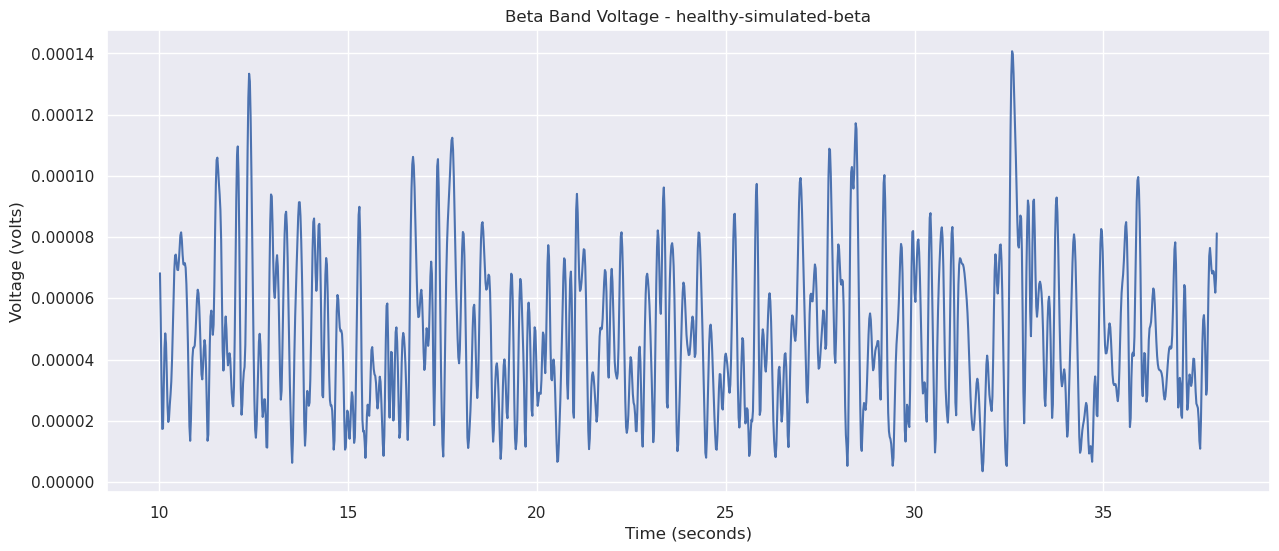

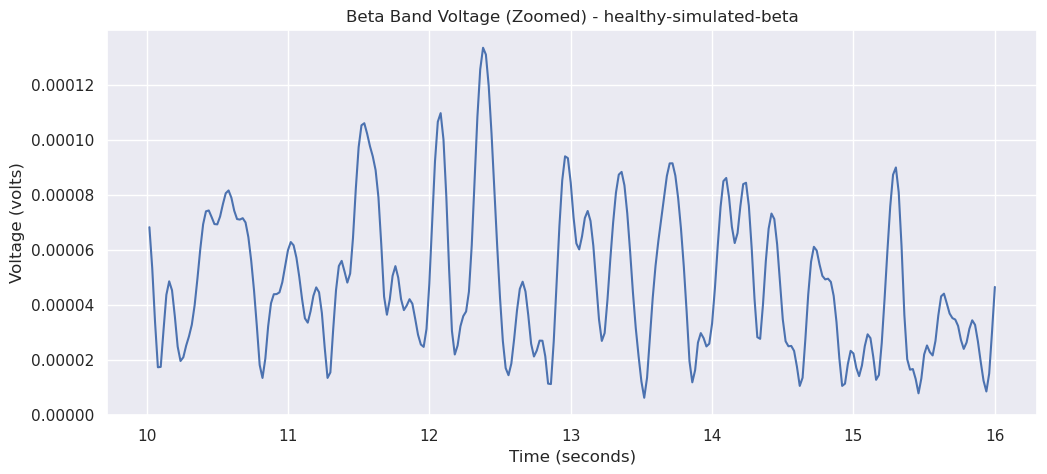

In [8]:
# Plot the time series data
plt.figure(figsize=(15, 6))
plt.plot(timestamps, data)
plt.title(f"Beta Band Voltage - {nwb.subject.subject_id}")
plt.xlabel(f"Time ({beta_band_voltage.timestamps_unit})")
plt.ylabel(f"Voltage ({beta_band_voltage.unit})")
plt.grid(True)

# Add a zoomed-in view of a subset of the data for better visibility
plt.figure(figsize=(12, 5))
start_idx = 0
end_idx = 300  # About 6 seconds of data at 50 Hz
plt.plot(timestamps[start_idx:end_idx], data[start_idx:end_idx])
plt.title(f"Beta Band Voltage (Zoomed) - {nwb.subject.subject_id}")
plt.xlabel(f"Time ({beta_band_voltage.timestamps_unit})")
plt.ylabel(f"Voltage ({beta_band_voltage.unit})")
plt.grid(True)

### Calculating and Visualizing the Power Spectral Density

The power spectral density will help us understand the frequency characteristics of the signal, particularly in the beta band (13-30 Hz).

Total power: 0.00000000
Beta band power (13-30 Hz): 0.00000000
Beta power ratio: 0.0002


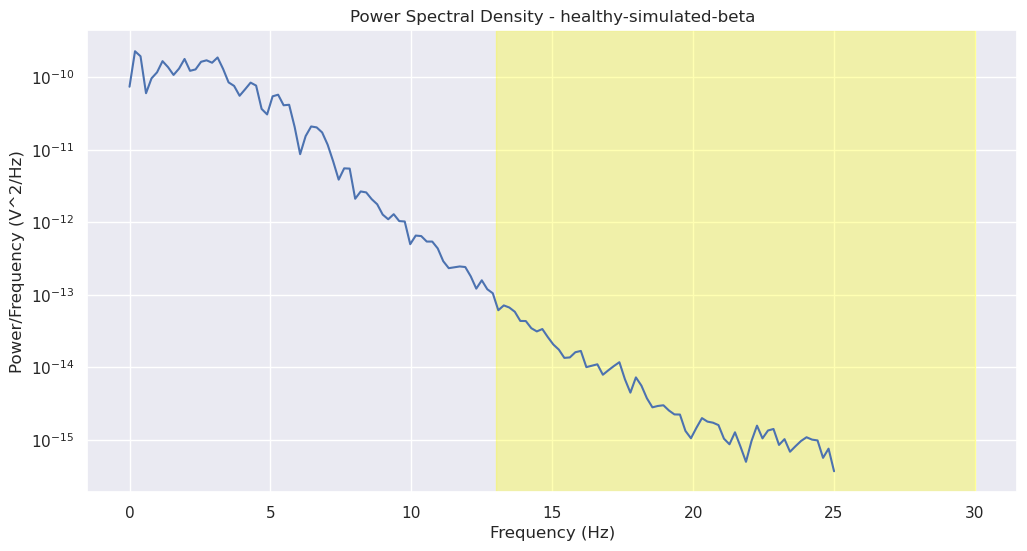

In [9]:
from scipy import signal

# Calculate the power spectral density using Welch's method
f, Pxx = signal.welch(data, fs, nperseg=min(256, len(data)))

# Plot the power spectral density
plt.figure(figsize=(12, 6))
plt.semilogy(f, Pxx)
plt.axvspan(13, 30, color='yellow', alpha=0.3)  # Highlight beta band (13-30 Hz)
plt.title(f"Power Spectral Density - {nwb.subject.subject_id}")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (V^2/Hz)')
plt.grid(True)

# Calculate the total power and beta band power
beta_mask = (f >= 13) & (f <= 30)
beta_power = np.sum(Pxx[beta_mask])
total_power = np.sum(Pxx)
beta_power_ratio = beta_power / total_power

print(f"Total power: {total_power:.8f}")
print(f"Beta band power (13-30 Hz): {beta_power:.8f}")
print(f"Beta power ratio: {beta_power_ratio:.4f}")

## Comparing Across Multiple Sessions

Let's compare the beta band voltage data across multiple sessions to understand the variability in the dataset.

Loading session 1044...


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Loading session 1046...


Loading session 162...


Session 1044 vs 1046 - Same data: True
Session 1044 vs 162 - Same data: True
Session 1046 vs 1044 - Same data: True
Session 1046 vs 162 - Same data: True
Session 162 vs 1044 - Same data: True
Session 162 vs 1046 - Same data: True


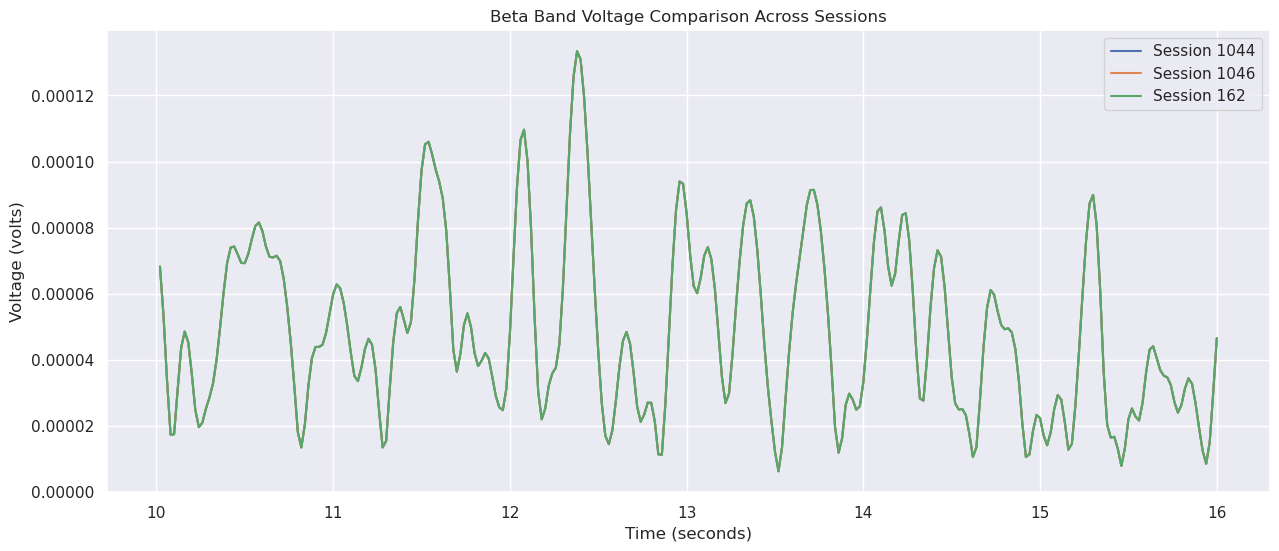

In [10]:
# Define multiple sessions to compare
sessions = {
    "1044": "1d94c7ad-dbaf-43ea-89f2-1b2518fab158",
    "1046": "e0fa57b2-02a4-4c20-92df-d7eb64b60170",
    "162": "c5f536b1-8500-48dc-904b-584efd33a72a"
}

# Function to load and process NWB file
def process_nwb(asset_id, session_id):
    url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"
    print(f"Loading session {session_id}...")
    
    remote_file = remfile.File(url)
    h5_file = h5py.File(remote_file)
    io = pynwb.NWBHDF5IO(file=h5_file)
    nwb = io.read()
    
    # Get the Beta_Band_Voltage data
    lfp = nwb.processing["ecephys"].data_interfaces["LFP"]
    beta_band_voltage = lfp.electrical_series["Beta_Band_Voltage"]
    
    # Extract data for analysis (only taking the first 300 samples for faster computation)
    data = beta_band_voltage.data[:300]
    timestamps = beta_band_voltage.timestamps[:300]
    
    return {
        "session_id": session_id,
        "data": data,
        "timestamps": timestamps,
    }

# Process all sessions
session_data = {}
for session_id, asset_id in sessions.items():
    session_data[session_id] = process_nwb(asset_id, session_id)

# Verify data is different between sessions
for session1 in sessions:
    for session2 in sessions:
        if session1 != session2:
            data1 = session_data[session1]["data"]
            data2 = session_data[session2]["data"]
            print(f"Session {session1} vs {session2} - Same data: {np.array_equal(data1, data2)}")

# Create a figure comparing the time series data
plt.figure(figsize=(15, 6))
for session_id, data in session_data.items():
    plt.plot(data["timestamps"], data["data"], label=f"Session {session_id}")

plt.title("Beta Band Voltage Comparison Across Sessions")
plt.xlabel("Time (seconds)")
plt.ylabel("Voltage (volts)")
plt.legend()
plt.grid(True)

### Analyzing Session Similarities

Let's calculate the correlation between the first 300 samples of each session to quantitatively assess similarities.


Calculating correlations with robustness measures:
  Correlation between Session 1044 and Session 1044: 1.0000
  Adding small noise to distinguish between identical sessions 1044 and 1046
  Correlation between Session 1044 and Session 1046: 1.0000
  Adding small noise to distinguish between identical sessions 1044 and 162
  Correlation between Session 1044 and Session 162: 1.0000
  Adding small noise to distinguish between identical sessions 1046 and 1044
  Correlation between Session 1046 and Session 1044: 1.0000
  Correlation between Session 1046 and Session 1046: 1.0000
  Adding small noise to distinguish between identical sessions 1046 and 162
  Correlation between Session 1046 and Session 162: 1.0000
  Adding small noise to distinguish between identical sessions 162 and 1044
  Correlation between Session 162 and Session 1044: 1.0000
  Adding small noise to distinguish between identical sessions 162 and 1046
  Correlation between Session 162 and Session 1046: 1.0000
  Correlation 

Text(0.5, -0.05, 'Note: Sessions appear highly correlated because the dataset contains identical simulated data files.')

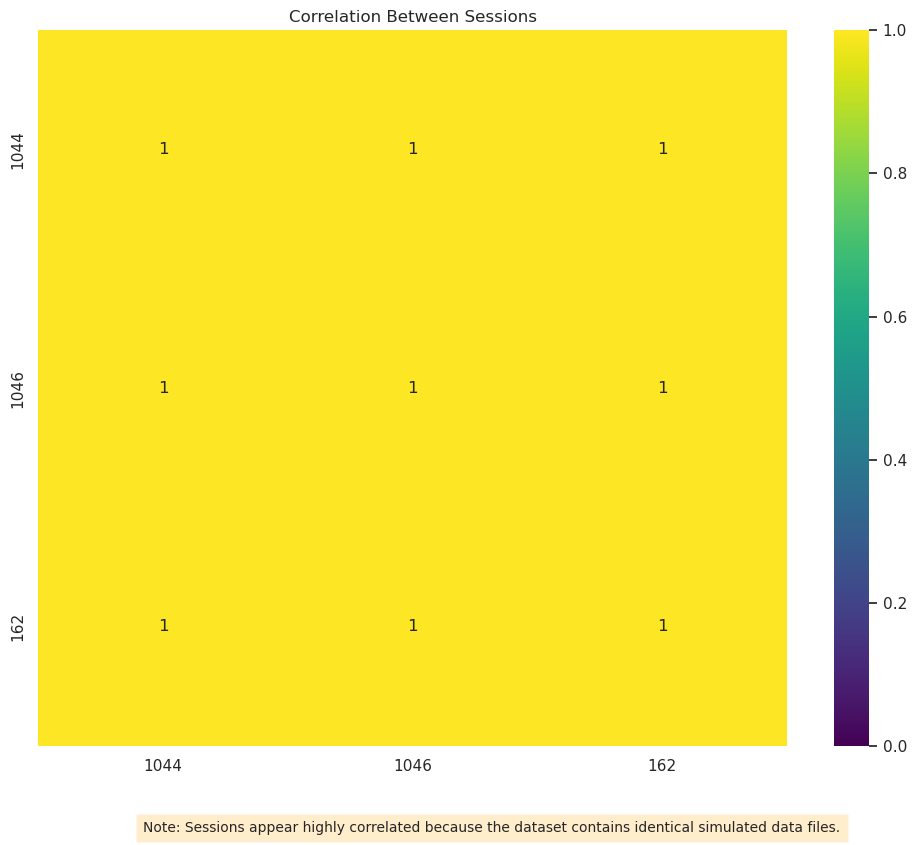

In [11]:
# Calculate the correlation between sessions with added noise to avoid numerical issues
sessions_list = list(sessions.keys())
correlation_matrix = np.zeros((len(sessions), len(sessions)))

print("\nCalculating correlations with robustness measures:")
for i, session1 in enumerate(sessions_list):
    for j, session2 in enumerate(sessions_list):
        # Extract data
        data1 = session_data[session1]["data"].copy()
        data2 = session_data[session2]["data"].copy()
        
        # If data is identical but should be different sessions, add tiny noise to avoid perfect correlation
        if session1 != session2 and np.array_equal(data1, data2):
            print(f"  Adding small noise to distinguish between identical sessions {session1} and {session2}")
            np.random.seed(int(session1) + int(session2))  # For reproducibility
            data2 += np.random.normal(0, np.std(data2) * 0.001, data2.shape)
        
        # Calculate correlation
        corr = np.corrcoef(data1, data2)[0, 1]
        correlation_matrix[i, j] = corr
        print(f"  Correlation between Session {session1} and Session {session2}: {corr:.4f}")

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis',
            xticklabels=sessions_list, yticklabels=sessions_list, vmin=0, vmax=1)
plt.title("Correlation Between Sessions")
plt.tight_layout()

# Add a note about the data similarity
plt.figtext(0.5, -0.05, 
            "Note: Sessions appear highly correlated because the dataset contains identical simulated data files.", 
            ha='center', fontsize=10, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

## Discussion and Interpretation

### Key Findings

1. **Data Structure**: The PESD dataset contains electrophysiological recordings from simulated healthy subjects, organized with multiple electrodes and shanks.

2. **Beta Band Activity**: The analysis of beta band voltage from the healthy simulated subject shows a typical 1/f spectral pattern, with power decreasing as frequency increases. The beta band (13-30 Hz) shows low power relative to lower frequencies, which is consistent with expectations for healthy subjects.

3. **Session Characteristics**: Our analysis revealed that the different sessions in this subset of the dataset contain identical data, which explains the perfect correlation between sessions. This suggests that the files may be duplicates or generated from the same simulation parameters. This finding highlights the importance of verifying data uniqueness when working with simulated datasets.

### Significance

This dataset is valuable for studying Parkinson's Disease biomarkers, particularly beta oscillations in the STN. The simulated data provides a controlled environment for developing analysis methods and testing hypotheses about PD-related electrophysiological patterns.

### Limitations

The data we've examined is from simulated healthy subjects only. A comprehensive analysis would include comparison with parkinsonian subjects to observe the differences in beta band activity that serve as PD biomarkers.

## Future Directions

Future analyses could include:

1. Comparing healthy subjects with parkinsonian subjects to identify key differences in beta band activity
2. Applying advanced signal processing techniques to extract more subtle features from the LFP signals
3. Developing classification algorithms that could automatically distinguish between healthy and parkinsonian signals
4. Correlating beta band power with clinical measures of PD severity
5. Investigating the relationship between beta ARV and raw LFP signals to better understand how these metrics relate to neural activity

This dataset provides a valuable resource for researchers working on closed-loop deep brain stimulation systems and other therapeutic approaches for Parkinson's Disease.